In [1]:
import numpy as np
import os
import sys
from yaml import load
import csv

from IPython.display import Image, display
import PIL.Image
from cStringIO import StringIO

lib_dir = os.path.join(os.getcwd(), "..", "preprocessing")
sys.path.insert(0, lib_dir)

import librosa
import scipy
import audio
import graphic
from preprocessing_commons import apply_melfilter, generate_spectrograms, read_wav_dirty, sliding_audio, downsample

%matplotlib inline

In [2]:
config = load(open("../learning/config.yaml", "rb"))
csv_reader = csv.reader(open(config["train_data_dir"] ))

audio_files = [filename for (filename, label) in csv_reader]

In [3]:
def show_array(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [4]:
def create_spectrogram(signal, sample_rate):

    mel_image = apply_melfilter(signal, sample_rate, nfilt=40)
    mel_image = graphic.colormapping.to_grayscale(mel_image, bytes=True)
    
  
    
    mel_image_equalized = graphic.histeq.histeq(mel_image)
    return mel_image_equalized

In [5]:
def create_full_spectrogram(signal, sample_rate):
    
    spectrogram = audio.spectrogram.spectrogram_cutoff(sample_rate, signal, winlen=0.00833, winstep=0.00833)
    spectrogram_equalized = graphic.histeq.histeq(spectrogram)
    
    return spectrogram_equalized

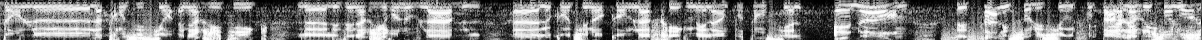

In [6]:
signal, sampling_rate = read_wav_dirty(audio_files[0])

spectrogram = create_spectrogram(signal, sampling_rate)
show_array(spectrogram)

In [7]:
signal_duration = len(signal) / sampling_rate # seconds
segment_length = 5.0 # one second intervals

def split_signal():
    for i in np.arange(0, signal_duration, segment_length): 
        chunk_duration = sampling_rate * segment_length
        chunk_start = i * chunk_duration 
        chunk_end = chunk_start + chunk_duration
        
        print(chunk_start, chunk_end)
        signal_chunk = signal[chunk_start:chunk_end]
        show_array(create_full_spectrogram(signal_chunk, sampling_rate))

In [8]:
def split_images():
    image_chunk_length = spectrogram.shape[1] / signal_duration
    print(image_chunk_length,spectrogram.shape )
    for i in range(0, signal_duration): 
        image_start = i * image_chunk_length
        show_array(spectrogram[:,image_start:image_start + image_chunk_length,:])

In [9]:
%timeit split_signal
%timeit split_images

10000000 loops, best of 3: 30.6 ns per loop
The slowest run took 125.97 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 24.6 ns per loop


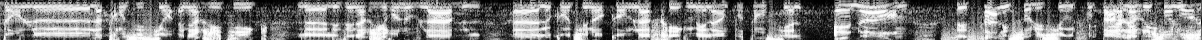

(0.0, 80000.0)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


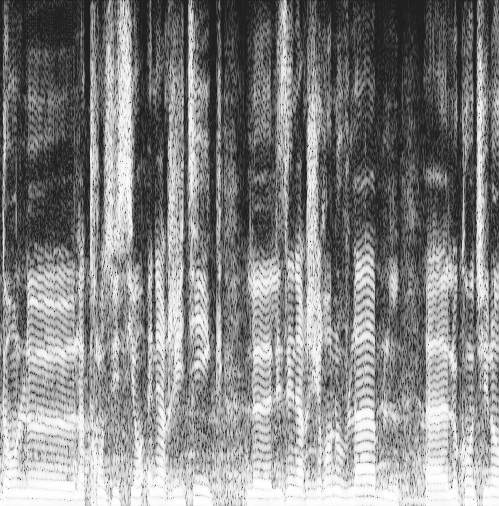

(400000.0, 480000.0)


IndexError: too many indices for array

In [10]:
show_array(spectrogram)
split_signal()
split_images()

In [ ]:
scipy.stats.describe(signal)

In [ ]:
spectrogram_thresholded = spectrogram.copy()
spectrogram_thresholded[spectrogram < 100] = 0
print(len(spectrogram_thresholded[spectrogram < 100]))
show_array(spectrogram_thresholded)

In [ ]:
from audioop import rms

for i in range(0, signal_duration): # one second intervals
    signal_start = i*sampling_rate
    signal_chunk = signal[signal_start:signal_start+sampling_rate]
    spectro = create_spectrogram(signal_chunk, sampling_rate)
    show_array(create_spectrogram(signal_chunk, sampling_rate))
    print(len(spectro[spectro < 100]))
    print(rms(signal_chunk, 4))
    

In [ ]:
audio_files[0]